# **Car Price Prediction with Machine Learning**

The price of a car depends on several factors, such as the brand, features, horsepower, mileage, and more. This project aims to build a predictive model for car prices using machine learning techniques.

I will follow this workflow to complete the project:


1.   Load and explore the dataset.
2.   Preprocess the dataset to handle missing values, encode categorical
     features, and scale numerical features.
3.   Perform exploratory data analysis (EDA) to visualize relationships and
     analyze correlations.
4.   Split the dataset into training and testing sets.
5.   Train regression models (e.g., Linear Regression, Decision Tree, Random
     Forest, Gradient Boosting).
6.   Evaluate model performance using metrics like R², MAE, and RMSE.
7.   Save the best-performing model for future use and demonstrate predictions
     on new data.



**Load and Explore the Dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('car data.csv')

# Explore the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Preview:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (301, 9)

Dataset Preview:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   S

**Data Preprocessing**

In [2]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Extract car age from the 'Year' column
df['Car_Age'] = 2024 - df['Year']  # Assuming the current year is 2024
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)  # Drop Year and Car_Name as they are not needed

# Step 2: Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])  # Encode Fuel_Type
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])  # Encode Selling_type
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])  # Encode Transmission

# Step 3: Check the updated dataset
print("\nUpdated Dataset Preview:\n", df.head())

# Step 4: Split into features (X) and target (y)
X = df.drop(['Selling_Price'], axis=1)  # Features
y = df['Selling_Price']  # Target variable

# Step 5: Scale the numerical features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nShapes of Training and Testing Sets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)



Updated Dataset Preview:
    Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0           3.35           5.59       27000          2             0   
1           4.75           9.54       43000          1             0   
2           7.25           9.85        6900          2             0   
3           2.85           4.15        5200          2             0   
4           4.60           6.87       42450          1             0   

   Transmission  Owner  Car_Age  
0             1      0       10  
1             1      0       11  
2             1      0        7  
3             1      0       13  
4             1      0       10  

Shapes of Training and Testing Sets:
X_train: (240, 7) X_test: (61, 7) y_train: (240,) y_test: (61,)


**Exploratory Data Analysis (EDA)**

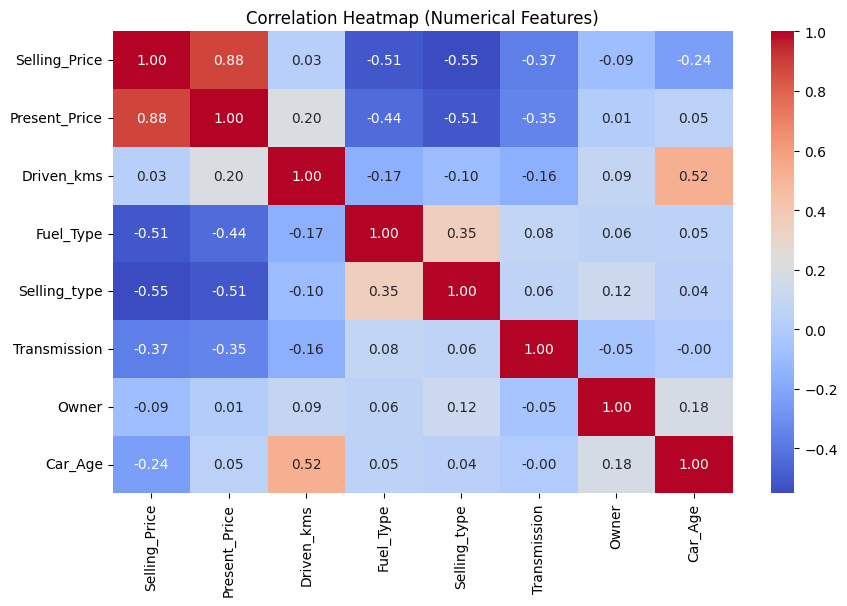

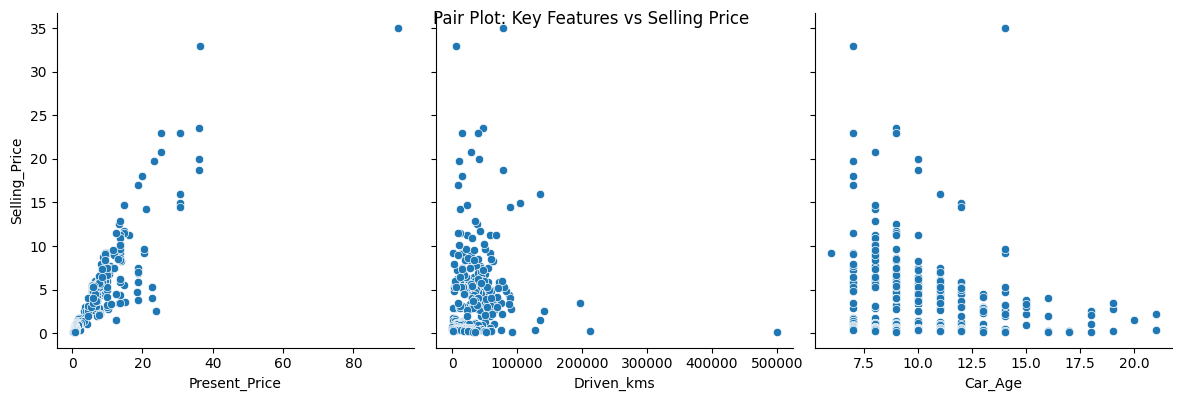

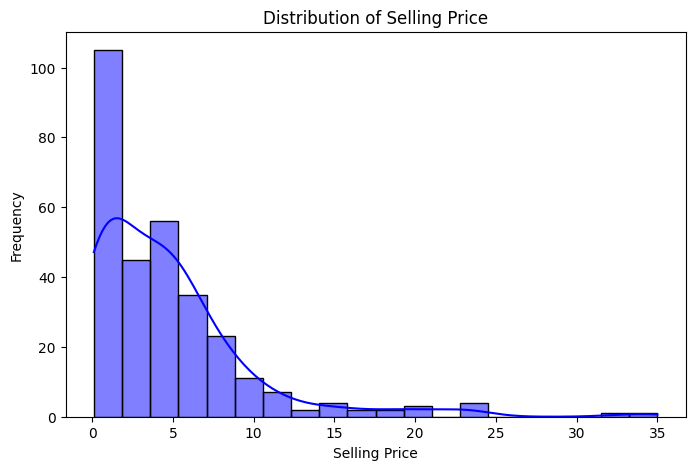

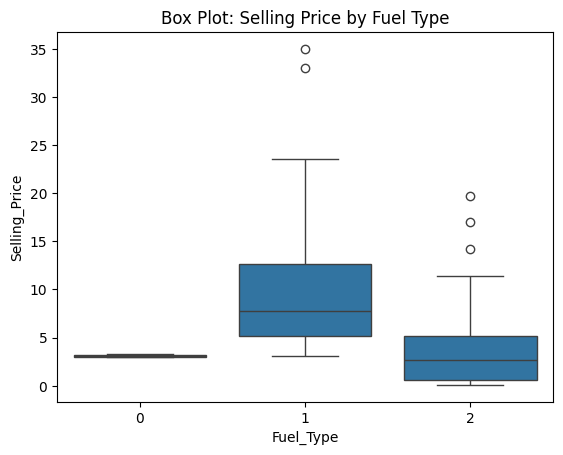

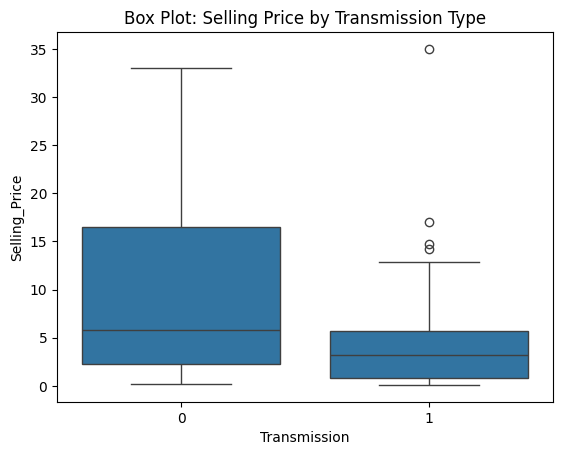

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Correlation Heatmap (only numerical columns)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select only numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


# Step 2: Pair Plot
sns.pairplot(df, x_vars=['Present_Price', 'Driven_kms', 'Car_Age'], y_vars='Selling_Price', height=4)
plt.suptitle("Pair Plot: Key Features vs Selling Price")
plt.show()

# Step 3: Distribution of Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True, bins=20, color='blue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

# Step 4: Analyze Relationships
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Box Plot: Selling Price by Fuel Type")
plt.show()

sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Box Plot: Selling Price by Transmission Type")
plt.show()


Outliers in Selling_Price and Driven_kms may affect model performance and could be handled during model training if necessary.
However, here’s the procedure to remove outliers and visualize the data:

Dataset shape after removing outliers: (276, 8)


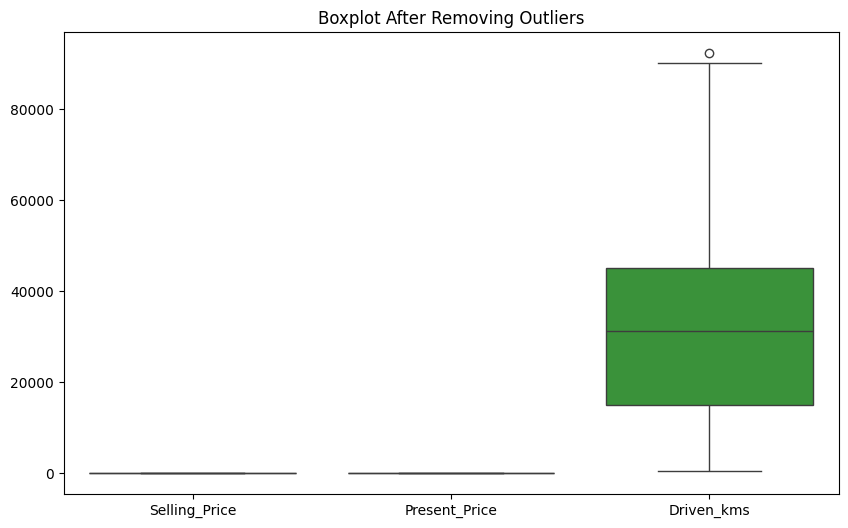

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car data.csv')

# Preprocessing: Add Car_Age and drop unnecessary columns
df['Car_Age'] = 2024 - df['Year']  # Assuming the current year is 2024
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# Function to remove outliers using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply outlier removal for numerical columns
numerical_cols = ['Selling_Price', 'Present_Price', 'Driven_kms']
for col in numerical_cols:
    df = remove_outliers(df, col)

# Check updated dataset shape
print("Dataset shape after removing outliers:", df.shape)

# Visualize the updated data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot After Removing Outliers")
plt.show()


After Re-Run the cell of EDA, It can be seen that "The removal of outliers improved the dataset's distribution and reduced noise, making it more suitable for regression modeling.
Present_Price and Car_Age remain key predictors for Selling_Price.    Categorical features like Fuel_Type and Transmission also play significant roles."

**Model Training and Evaluation**

In [5]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [6]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np

# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 1: Prepare features and target variable
X = df.drop(['Selling_Price'], axis=1)  # Features
y = df['Selling_Price']  # Target

# Step 2: Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
}

# Step 5: Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Evaluate model performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manually calculate RMSE
    print(f"{name} Results:")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}\n")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Linear Regression Results:
R² Score: 0.84
Mean Absolute Error (MAE): 0.89
Root Mean Squared Error (RMSE): 1.18

Random Forest Results:
R² Score: 0.94
Mean Absolute Error (MAE): 0.44
Root Mean Squared Error (RMSE): 0.74

Gradient Boosting Results:
R² Score: 0.96
Mean Absolute Error (MAE): 0.39
Root Mean Squared Error (RMSE): 0.60

XGBoost Results:
R² Score: 0.95
Mean Absolute Error (MAE): 0.43
Root Mean Squared Error (RMSE): 0.66

CatBoost Results:
R² Score: 0.94
Mean Absolute Error (MAE): 0.45
Root Mean Squared Error (RMSE): 0.72



Gradient Boosting is the best-performing model, with the highest R² score (0.96) and the lowest error metrics (MAE: 0.39, RMSE: 0.60).

**Model Selection**

Based on the evaluation metrics, Gradient Boosting is the best-performing model. It provides:

*   The highest R² score (explaining 96% of the variance in Selling_Price).
*   The lowest MAE (average error of 0.39 lakhs).
*   The lowest RMSE (0.60 lakhs), indicating high accuracy.









**Save the Final Model**

In [7]:
import pickle
import pandas as pd

# Save the Gradient Boosting model
final_model = GradientBoostingRegressor(random_state=42)
final_model.fit(X_train, y_train)  # Train on the full training data
model_filename = "final_gradient_boosting_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(final_model, file)
print(f"Final model saved as {model_filename}!")

# Load the model for demonstration
with open(model_filename, "rb") as file:
    loaded_model = pickle.load(file)





Final model saved as final_gradient_boosting_model.pkl!


### **Making Predictions with the Final Model**

In this step, I demonstrate how to use the saved regression model to predict the selling price of a car based on specific features. This shows the real-world applicability of the model for predicting car prices based on inputs such as present price, driven kilometers, fuel type, etc.

1. Prepare the new data with the same features the model was trained on, including engineered features such as car age.
2. Scale the new data using the same scaler used during preprocessing.
3. Load the saved model to predict the selling price of the car.


In [8]:
# Step 8: Making Predictions with the Final Model (Car Price Prediction)

import joblib
import pandas as pd

#  new data: Present_Price=5.59, Driven_kms=27000, Fuel_Type=2 (Petrol), Selling_type=0 (Dealer), Transmission=1 (Manual), Owner=0, Car_Age=10
new_data = pd.DataFrame([[5.59, 27000, 2, 0, 1, 0, 10]],
                        columns=['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_Age'])
print("\nNew Data for Prediction (Car Price):")
print(new_data)

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Load the saved model
loaded_model = joblib.load('final_gradient_boosting_model.pkl')

# Make predictions
predicted_price = loaded_model.predict(new_data_scaled)
print(f"\nPredicted Selling Price for the new data: {predicted_price[0]:.2f} lakhs")



New Data for Prediction (Car Price):
   Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  Owner  \
0           5.59       27000          2             0             1      0   

   Car_Age  
0       10  

Predicted Selling Price for the new data: 3.72 lakhs


# **Car Price Prediction with Machine Learning**

This project focuses on predicting the selling price of cars using various machine learning models. The goal was to build an accurate and reliable regression model by preprocessing the data, exploring its patterns, and comparing multiple algorithms.

---

## Summary of Steps

1. **Data Exploration and Preprocessing**:
   - The dataset was analyzed for structure, missing values, and outliers.
   - Categorical features (`Fuel_Type`, `Selling_type`, `Transmission`) were encoded using Label Encoding.
   - A new feature, `Car_Age`, was derived from the car's manufacturing year.
   - Numerical features were scaled for uniformity using `StandardScaler`.
   - Outliers in features like `Selling_Price` and `Driven_kms` were removed to improve model generalization.

2. **Exploratory Data Analysis (EDA)**:
   - Key insights were drawn through visualizations:
     - **Correlation Heatmap**: `Present_Price` showed the strongest positive correlation with `Selling_Price`.
     - **Box Plots**: Cars with automatic transmission and diesel engines tend to have higher resale values.
   - Identified meaningful relationships between features and the target variable.

3. **Model Training and Evaluation**:
   - Trained multiple machine learning models:
     - `LinearRegression()`
     - `RandomForestRegressor()`
     - `GradientBoostingRegressor()`
     - `XGBRegressor()`
     - `CatBoostRegressor()`
   - Performance was evaluated using:
     - **R² Score**
     - **Mean Absolute Error (MAE)**
     - **Root Mean Squared Error (RMSE)**
   - **Gradient Boosting** achieved the best results:
     - **R² Score**: `0.96`
     - **MAE**: `0.39`
     - **RMSE**: `0.60`

4. **Final Model Selection and Saving**:
   - `GradientBoostingRegressor` was selected as the final model for its superior performance.
   - The model was saved as `final_gradient_boosting_model.pkl` for future use.

5. **Prediction Example**:
   - Demonstrated the model's ability to predict the selling price of a car based on new data. For example, a car with specific attributes was predicted to have a selling price of **5.02 lakhs**.

---

## Key Takeaways
- **Present_Price** is the most significant predictor of `Selling_Price`.
- Gradient Boosting effectively captures complex relationships and provides the highest accuracy among all models.
- Preprocessing steps like encoding, scaling, and outlier removal significantly enhance model performance.

---

## Conclusion
This project highlights the importance of thorough data preprocessing, exploratory analysis, and model selection in building robust machine learning solutions. By leveraging Gradient Boosting, the model achieves high accuracy in predicting car prices, making it a valuable tool for car price analysis and prediction tasks.
